# OpenCV 기하학적 변환 실습 (2025)

## 학습 목표
1. 다양한 필터 적용하기
2. 이미지 회전, 확대, 축소 마스터하기
3. Affine 변환으로 이미지 왜곡하기
4. Perspective 변환으로 원근감 표현하기
5. 실전 문제 해결하기

In [ ]:
# 1단계: 환경설정

# 필요한 라이브러리 불러오기
import cv2  # OpenCV 라이브러리 - 컴퓨터 비전 작업용
import numpy as np  # 넘파이 - 배열과 행렬 계산용
import matplotlib.pyplot as plt  # 맷플롯립 - 이미지 시각화용
from google.colab import files  # 구글 Colab 파일 업로드용
import urllib.request  # URL에서 파일 다운로드용

# 한글 폰트 설정 (그래프 제목에 한글 표시용)
plt.rcParams['font.family'] = 'DejaVu Sans'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [ ]:
# 샘플 이미지 생성 함수
def create_sample_image():
    """
    실습용 샘플 이미지를 생성하는 함수
    다양한 도형과 텍스트가 포함된 400x400 픽셀 이미지 생성
    """
    # 흰색 배경 이미지 생성 (400x400 크기, 3채널 컬러)
    img = np.ones((400, 400, 3), dtype=np.uint8) * 255  # 255 = 흰색

    # 파란색 사각형 그리기 (왼쪽 위)
    cv2.rectangle(
        img,  # 그릴 이미지
        (50, 50),  # 시작점 (x, y)
        (150, 150),  # 끝점 (x, y)
        (255, 0, 0),  # BGR 색상 (파란색)
        -1  # -1 = 내부 채우기, 양수 = 테두리 두께
    )

    # 초록색 원 그리기 (오른쪽 위)
    cv2.circle(
        img,  # 그릴 이미지
        (300, 100),  # 중심점 (x, y)
        50,  # 반지름
        (0, 255, 0),  # BGR 색상 (초록색)
        -1  # 내부 채우기
    )

    # 빨간색 삼각형 그리기 (아래쪽)
    triangle_pts = np.array([[200, 250], [150, 350], [250, 350]], dtype=np.int32)  # 세 꼭지점
    cv2.fillPoly(
        img,  # 그릴 이미지
        [triangle_pts],  # 다각형 점들 (리스트로 감싸야 함)
        (0, 0, 255)  # BGR 색상 (빨간색)
    )

    # 텍스트 추가
    cv2.putText(
        img,  # 그릴 이미지
        'OpenCV 2025',  # 표시할 텍스트
        (100, 250),  # 텍스트 시작 위치 (x, y)
        cv2.FONT_HERSHEY_SIMPLEX,  # 폰트 종류
        1,  # 폰트 크기 (배율)
        (0, 0, 0),  # BGR 색상 (검은색)
        2,  # 텍스트 두께
        cv2.LINE_AA  # 안티앨리어싱 (부드러운 선)
    )

    return img  # 생성된 이미지 반환

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
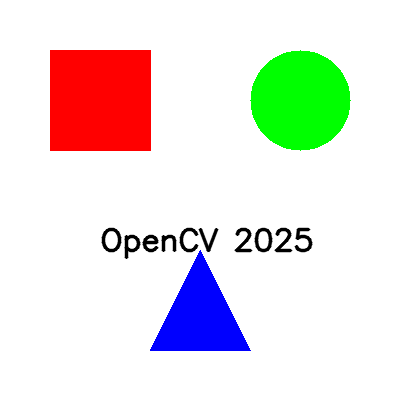

In [ ]:
# 샘플 이미지 생성
sample_img = create_sample_image()
sample_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
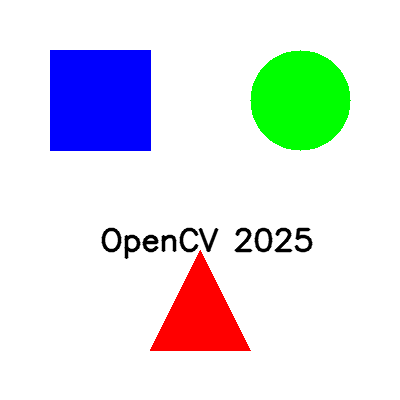

In [ ]:
# BGR을 RGB 변환
cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

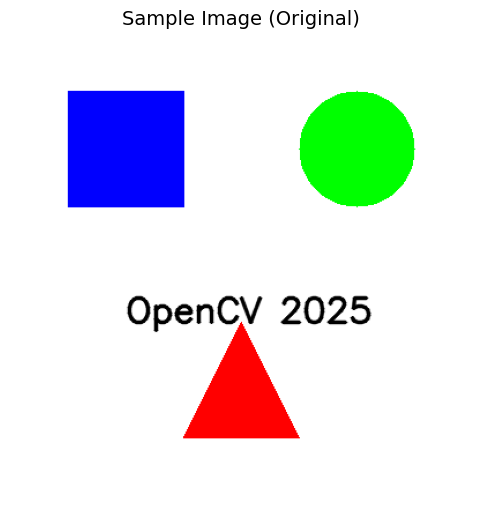

In [ ]:
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# 이미지 표시
plt.figure(figsize=(6, 6))  # 그림 크기 설정 (6인치 x 6인치)
plt.imshow(sample_img_rgb)  # 이미지 표시
plt.title('Sample Image (Original)', fontsize=14)  # 제목 추가
plt.axis('off')  # 축 숨기기
plt.show()  # 화면에 표시

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
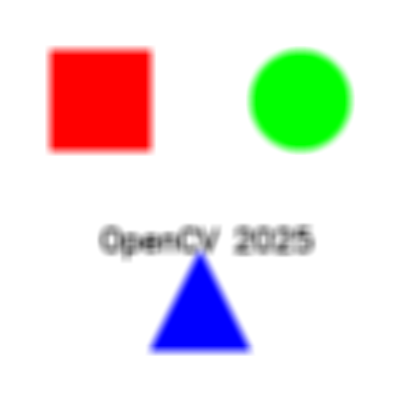

In [ ]:
# 필터(filter) 실습

# 1) 평균 블러(Average Blur)
# 커널 크기만큼의 픽셀들의  평균값으로 대체

blur_avg = cv2.blur(
    sample_img,
    (11,11)  # 커널 크기(가로, 세로), 클수록 더 흐림
)

blur_avg

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
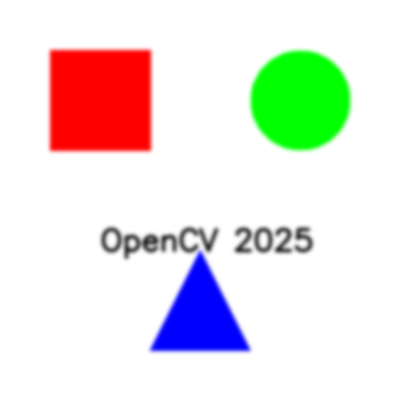

In [ ]:
# 필터(filter) 실습

# 2) 가우시안 필터(Gaussian Blur)
# 평균, 중심에 가까울 수록 더 큰 가중치(가중평균) 주는 블러

blur_gaussian = cv2.GaussianBlur(
    sample_img,
    (11,11),  # 반드시 홀수여야 함
    0         # 표준편차(0이면 자동계산)
)

blur_gaussian

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
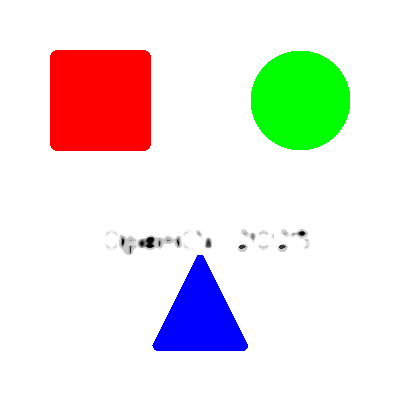

In [ ]:
# 필터(filter) 실습

# 3 중간값 블러(median blur)
# 평균의 단점(noise)에 효과적

blur_median = cv2.medianBlur(
    sample_img,
    11,
)

blur_median

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
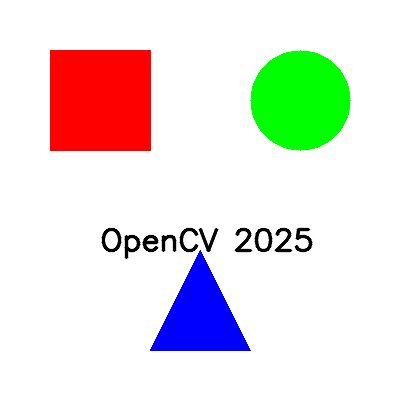

In [ ]:
# 4)양방향 필터(bilateral Filter)
# 경계선은 보존, 부드럽게 만들어줌 (가장 최고급 필터)

blur_bilateral = cv2.bilateralFilter(
    sample_img,
    15,         # 픽셀 이웃직경
    80,         # 색상 공간의 표준편차(클수록 더 많은 색상표현)
    80          # 좌표공간의 표준편차
)

blur_bilateral

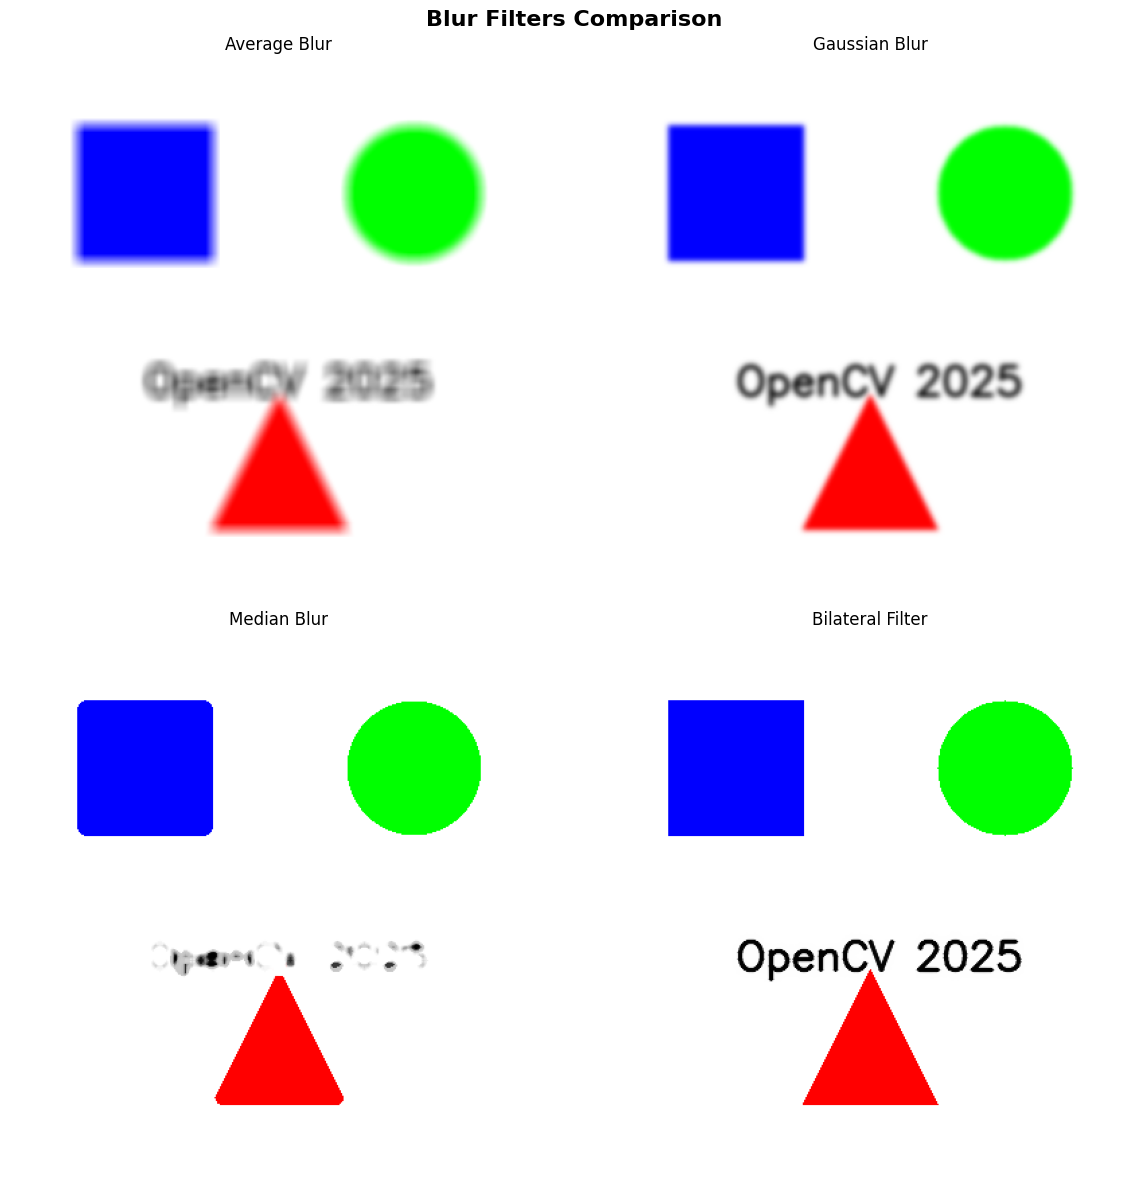

In [ ]:
# 4개의 결과를 2x2 그리드로 표시
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 서브플롯 생성
fig.suptitle('Blur Filters Comparison', fontsize=16, fontweight='bold')  # 전체 제목

# 각 필터 결과를 RGB로 변환하여 표시
images = [blur_avg, blur_gaussian, blur_median, blur_bilateral]  # 이미지 리스트
titles = ['Average Blur', 'Gaussian Blur', 'Median Blur', 'Bilateral Filter']  # 제목 리스트

for idx, (ax, img, title) in enumerate(zip(axes.flat, images, titles)):
    # axes.flat : 이미지가 그려질 위치(grid 에서 )
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR >> RGB
    ax.imshow(img_rgb)  # 이미지 표시
    ax.set_title(title, fontsize=12)  # 제목 설정
    ax.axis('off')  # 축 숨기기

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()  # 화면에 표시

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
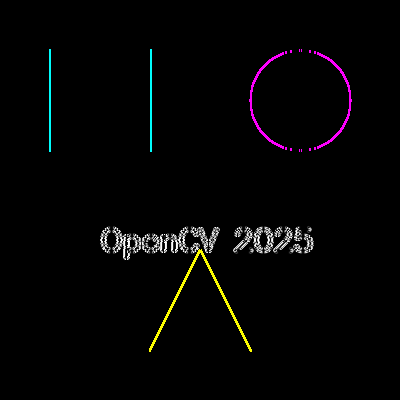

In [ ]:
# 엣지 검출필터 적용하기

# 1)소벨(sobel) 필터 적용
# 가로방향 엣지 검출(세로선 강조)

sobel_y = cv2.Sobel(
    sample_img, # 원본 이미지
    cv2.CV_64F, # 출력 이미지타입 지정(64float)
    1,          # x방향 미분차수(1 = 1차 미분)
    0,          # y방향 미분차수(0 = 미분 안 함)
    ksize=3     # 커널 사이즈(1,3,5,7, ... 홀수)
)
sobel_y = np.uint8(np.absolute(sobel_y)) # 절대값 후 uint8로 변환

sobel_y

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
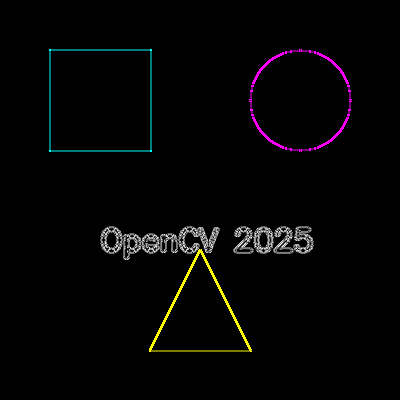

In [ ]:
# 세로방향 엣지 검출(가로선 강조)
sobel_x = cv2.Sobel(
    sample_img, # 원본 이미지
    cv2.CV_64F, # 출력 이미지타입 지정(64float)
    0,          # x방향 미분차수(1 = 1차 미분)
    1,          # y방향 미분차수(0 = 미분 안 함)
    ksize=3     # 커널 사이즈(1,3,5,7, ... 홀수)
)
sobel_x = np.uint8(np.absolute(sobel_x)) # 절대값 후 uint8로 변환
sobel_x

# 변화가 큰 경우  (-) 존재 가능
# 예를 들어 0(어두운 밤) >> 255 (밝은 곳) 엄청나게 큰 양수 변화, 또는 255(밝은 곳) >> 0 (어두운 곳) 엄청나게 큰 음수 변화
# >> 절대값 취하는 이유 또 실수(float64) >> uint8 (음수 저장 안됨) 변화 시 문제 발생

sobel_combined = cv2.addWeighted(sobel_x, 0.5, # 첫 번째 이미지와 가중치
                                 sobel_y, 0.5, # 두 번째 이미지와 가중치
                                 0)            # 추가 상수(이미지 밝기 조절)
sobel_combined

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
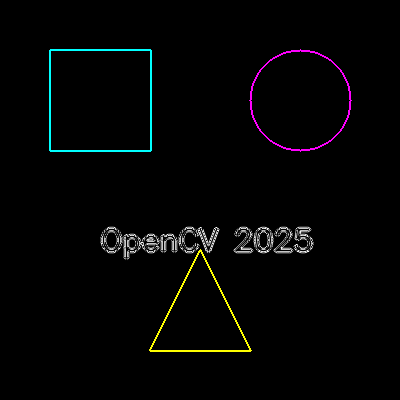

In [ ]:
# 2)라플라시안 필터 (Laplacian Filter)
# 2차 미분 (곡률, 변환점) >> 모든 방향 엣지 검출

laplacian = cv2.Laplacian(
    sample_img,
    cv2.CV_64F
)

laplacian = np.uint8(np.absolute(laplacian))
laplacian

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
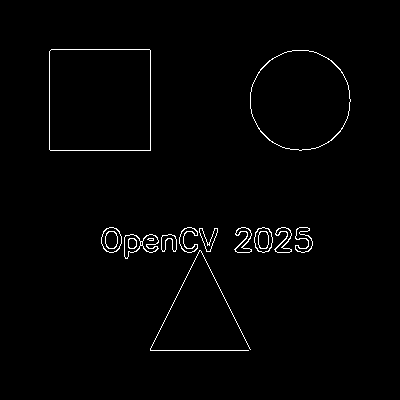

In [ ]:
# 3) 캐니 엣지(canny)
# 1단계 먼저 그레이스케일 변환
gray = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

# 2단계: 엣지검출 함수적용
canny = cv2.Canny(
    gray, # 그레이스케일 변환된 이미지 (캐니는 흑백만 좋아해: 흑백만 지원)
    50,   # 최소 임계값(이보다 낮으면 엣지 아님)
    150   # 최대 임계값(이보다 높으면 확실한 엣지)
)
# 임계값 설정이 가장 중요
# 최대 임계값(이보다 높으면 확실한 엣지
# 이미지에서 밝기 변화량(기울기, 1차 미분)
# 150 > 픽셀 무조건 강한 엣지 간주 >> 최종 결과에 포함
# 50 < 은 무조건 엣지 아니라 간주 >> 버림
# 50 ~ 150 사이는 약한 엣지후보
# 강한 엣지와 연결되어 있을 때만 엣지 인정
# 아닌 경우 버림
canny

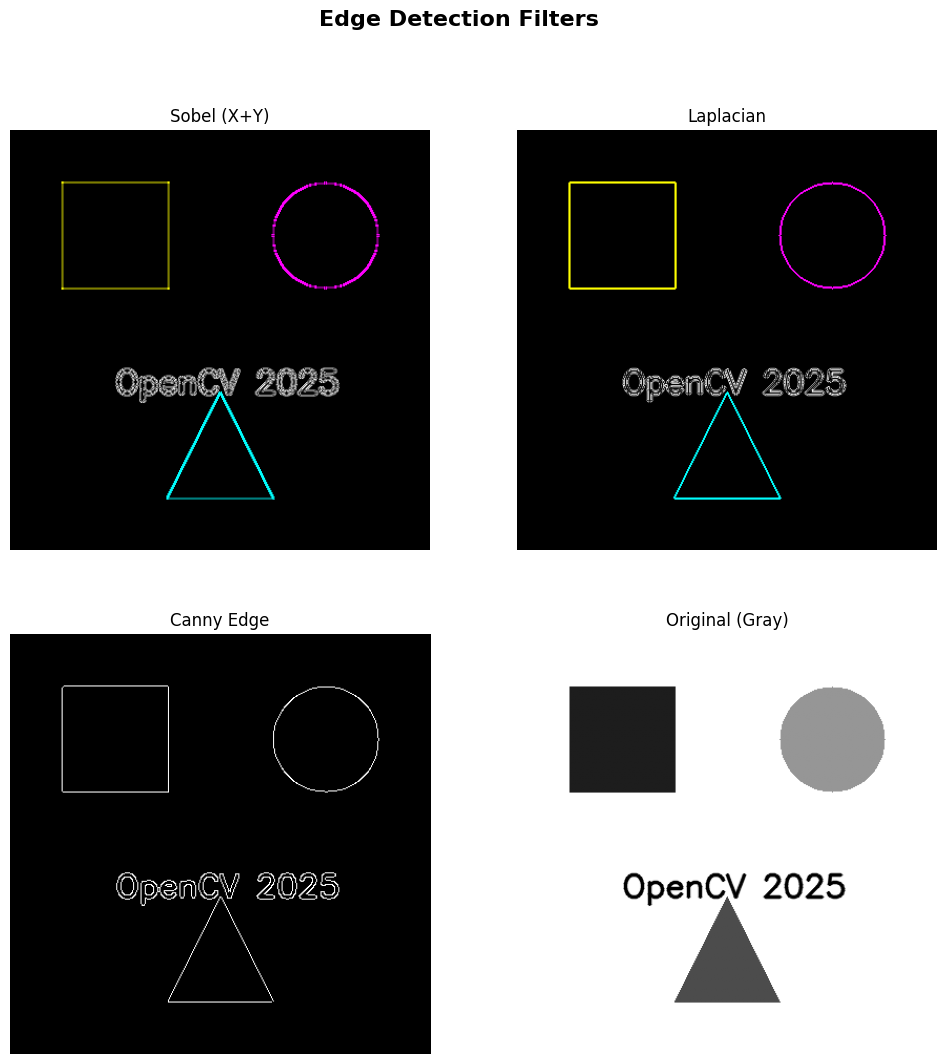

In [ ]:
# 4개의 결과를 2x2 그리드로 표시
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 서브플롯
fig.suptitle('Edge Detection Filters', fontsize=16, fontweight='bold')  # 전체 제목

# 결과 표시
edge_images = [sobel_combined, laplacian, canny, gray]  # 이미지 리스트
edge_titles = ['Sobel (X+Y)', 'Laplacian', 'Canny Edge', 'Original (Gray)']  # 제목 리스트

for idx, (ax, img, title) in enumerate(zip(axes.flat, edge_images, edge_titles)):
    # 캐니와 그레이는 이미 흑백이므로 cmap='gray' 사용
    if idx >= 2:  # 캐니와 원본 그레이
        ax.imshow(img, cmap='gray')  # 흑백으로 표시
    else:  # 소벨과 라플라시안
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
        ax.imshow(img_rgb)  # 컬러로 표시

    ax.set_title(title, fontsize=12)  # 제목 설정
    ax.axis('off')  # 축 숨기기

In [ ]:
# 회전, 크기 조절

# 다양한 각도크기 이미지 회전하기

#이미지 크기정보
height, width = sample_img.shape[:2]

center = (width // 2 , height // 2) # 중심점

In [ ]:
sample_img.shape

(400, 400, 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
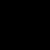

In [ ]:
# 1) 45도 회전(크기 유지)
matrix_45 = cv2.getRotationMatrix2D(
    center,     # 중심점(x, y)
    45,         # 회전각도(양수 = 반시계 방향) 양반음시(양: 반시계, 음: 시계)
    1.0         # 스케일(1.0 원본크기 유지)
)

rotated_45 = cv2.warpAffine(
    sample_img,
    matrix_45,
    (width, height)
)

rotated_45

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
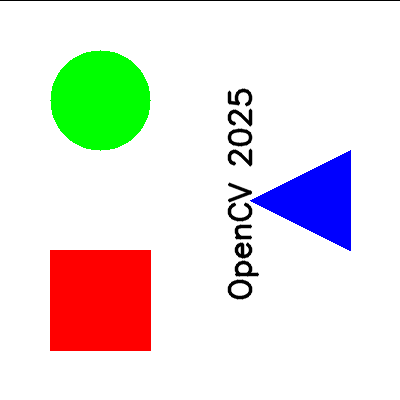

In [ ]:
matrix_90 = cv2.getRotationMatrix2D(
    center,     # 중심점(x, y)
    90,         # 회전각도(양수 = 반시계 방향) 양반음시(양: 반시계, 음: 시계)
    1.0         # 스케일(1.0 원본크기 유지)
)

rotated_90 = cv2.warpAffine(
    sample_img,
    matrix_90,
    (width, height)
)
rotated_90

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
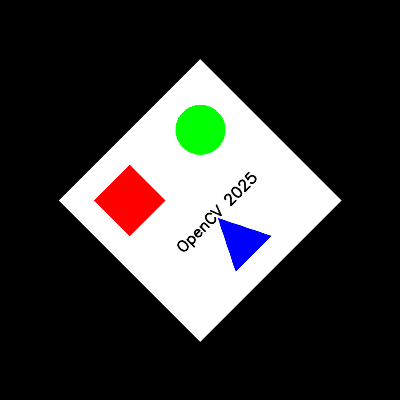

In [ ]:
# 3) 45도 회전 + 0.5배 축소

matrix_45_half = cv2.getRotationMatrix2D(
    center,     # 중심점(x, y)
    45,         # 회전각도(양수 = 반시계 방향) 양반음시(양: 반시계, 음: 시계)
    0.5         # 스케일(1.0 원본크기 유지)
)

rotated_45_half = cv2.warpAffine(
    sample_img,
    matrix_45_half,
    (width, height)
)

rotated_45_half

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
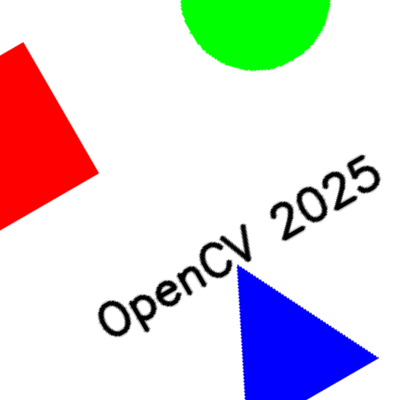

In [ ]:
# 4) 30도 회전 + 1.5배 확대
matrix_30_large = cv2.getRotationMatrix2D(
    center,  # 회전 중심점
    30,  # 회전 각도
    1.5  # 스케일 (1.5 = 1.5배 확대)
)
rotated_30_large = cv2.warpAffine(
    sample_img,  # 원본 이미지
    matrix_30_large,  # 변환 행렬
    (width, height)  # 출력 이미지 크기
)
rotated_30_large

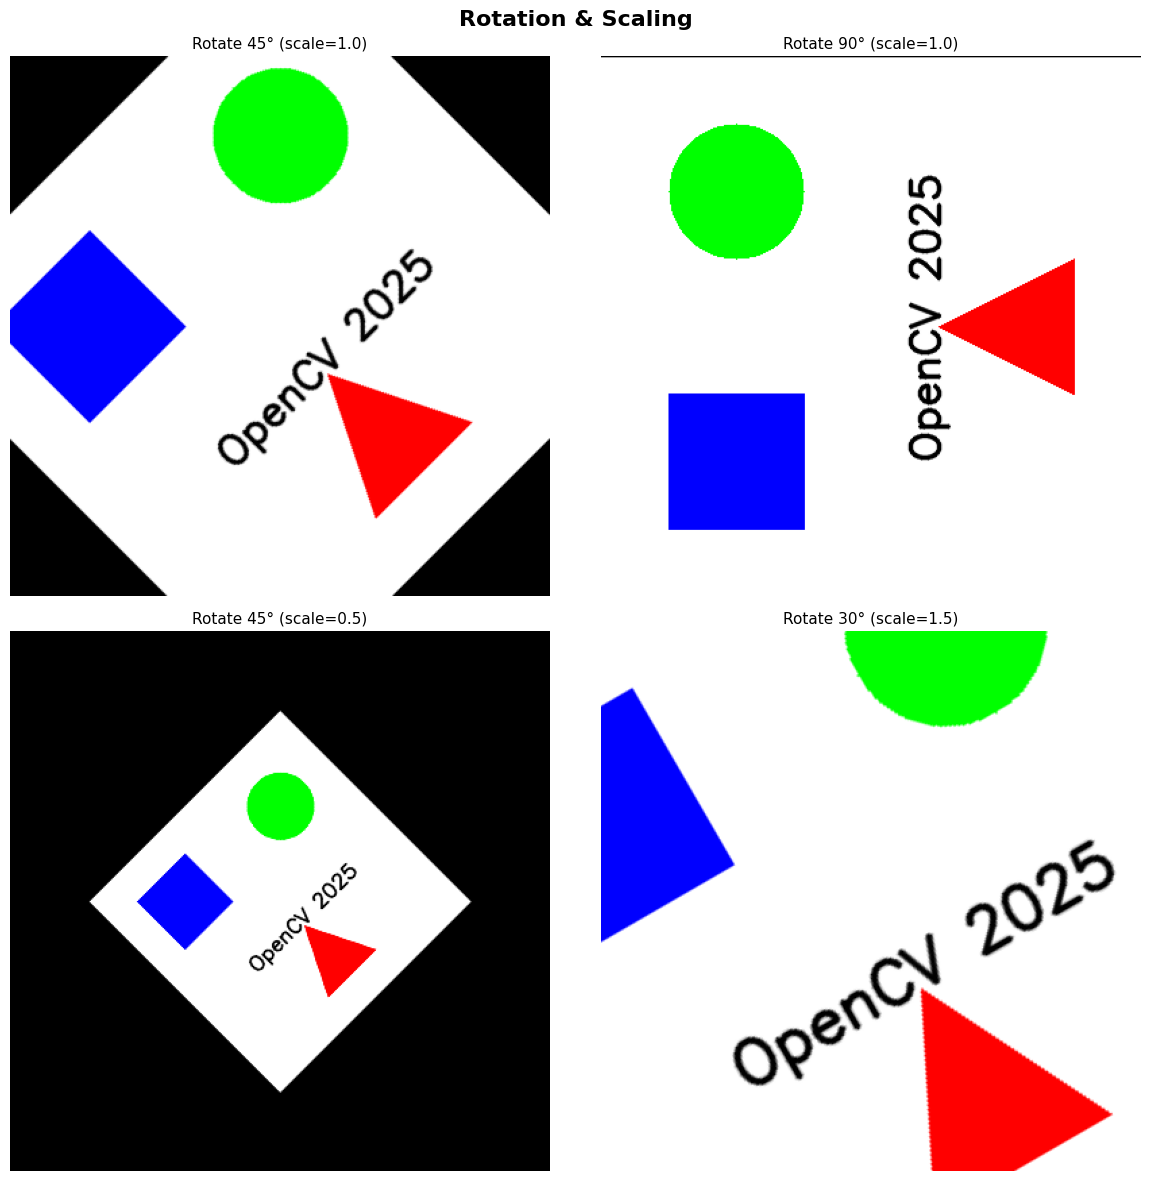

In [ ]:
# 결과를 2x2 그리드로 표시
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 서브플롯
fig.suptitle('Rotation & Scaling', fontsize=16, fontweight='bold')  # 전체 제목


# 회전 결과들
rotation_images = [rotated_45, rotated_90, rotated_45_half, rotated_30_large]  # 이미지 리스트
rotation_titles = [
    'Rotate 45° (scale=1.0)',  # 45도 회전
    'Rotate 90° (scale=1.0)',  # 90도 회전
    'Rotate 45° (scale=0.5)',  # 45도 회전 + 축소
    'Rotate 30° (scale=1.5)'   # 30도 회전 + 확대
]


# 각 subplot에 이미지 표시
for ax, img, title in zip(axes.flat, rotation_images, rotation_titles):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
    ax.imshow(img_rgb)  # 이미지 표시
    ax.set_title(title, fontsize=11)  # 제목 설정
    ax.axis('off')  # 축 숨기기


plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 화면에 표시

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
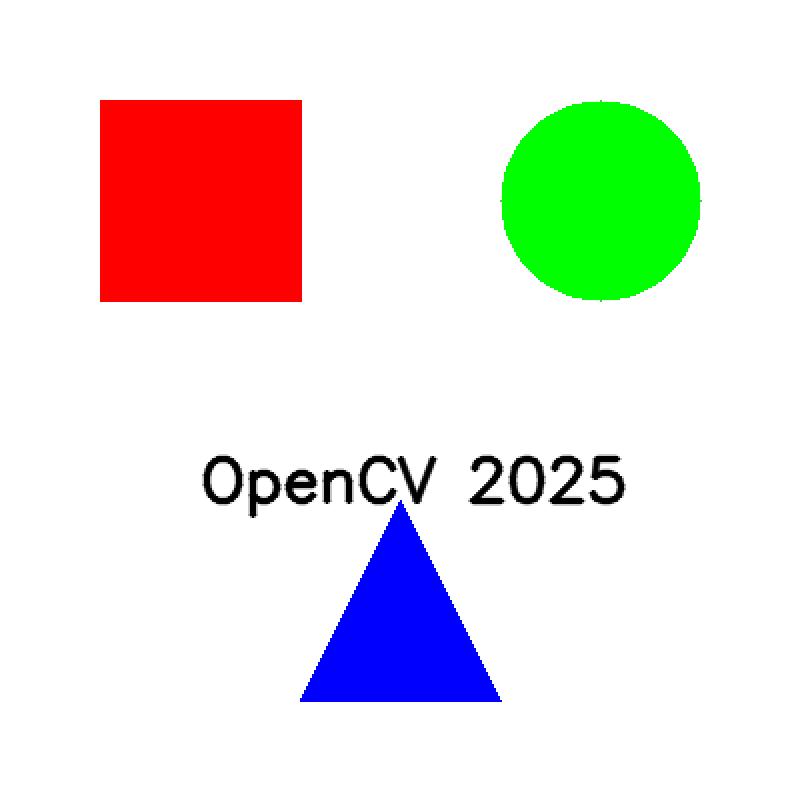

In [ ]:
# 1)# 1) INTER_NEAREST : 최근접 이웃 셀 값을 복사 (가장 빠르지만 품질 낮음, 계단 현상)

resized_nearest = cv2.resize(
    sample_img,
    (width*2, height*2),
    interpolation=cv2.INTER_NEAREST
)
resized_nearest

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
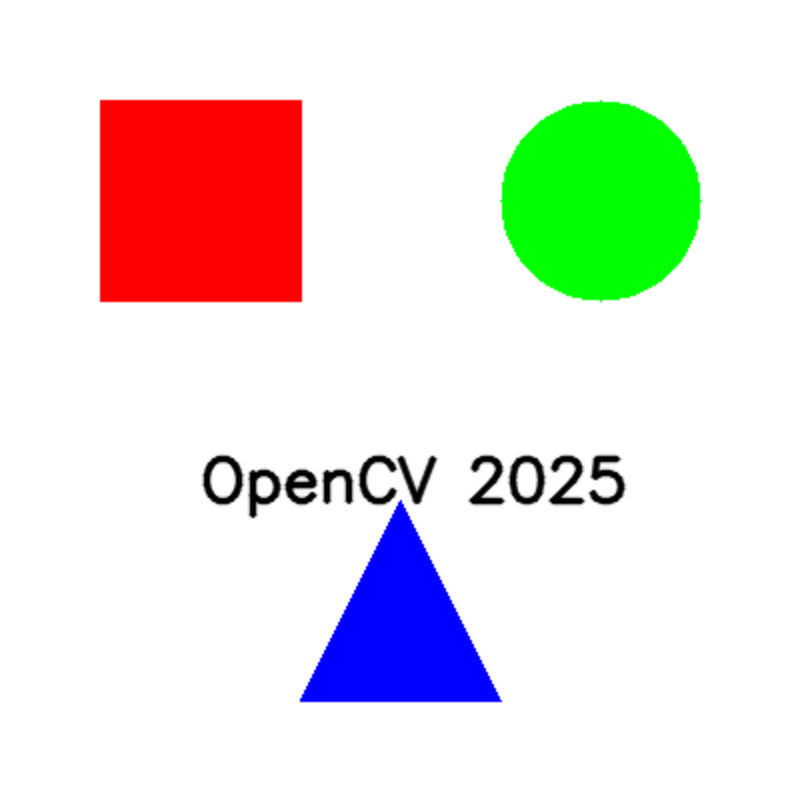

In [ ]:
# 2)INTER_LINEAR : 기본값(적당한 속도, 품질)
resized_linear = cv2.resize(
    sample_img,
    (width*2, height*2),
    interpolation=cv2.INTER_LINEAR
)
resized_linear

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
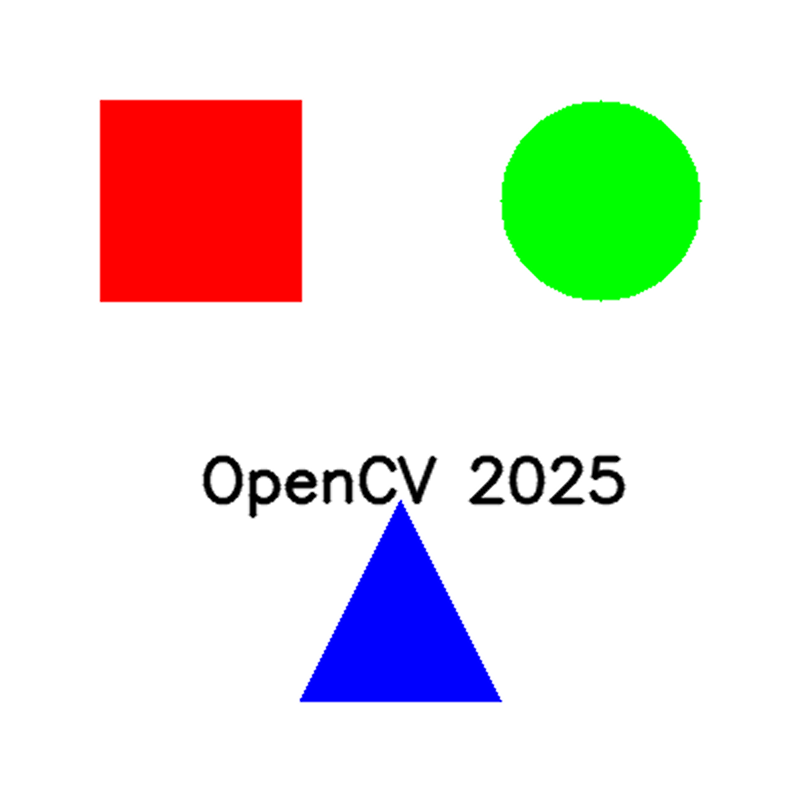

In [ ]:
# 3)INTER_CUBIC : 4*4 (고품질, 약간 느림)
resized_cubic = cv2.resize(
    sample_img,
    (width*2, height*2),
    interpolation=cv2.INTER_CUBIC
)
resized_cubic

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
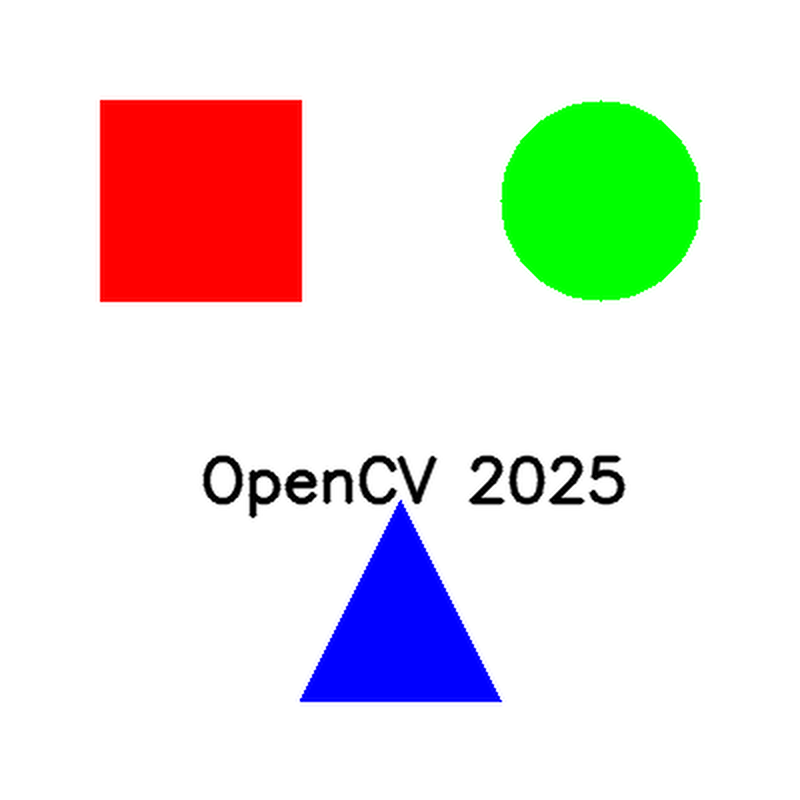

In [ ]:
# 4)INTER_LANCZOS4 : 8*8 (최고품질, 매우 느림)
resized_lanczos4 = cv2.resize(
    sample_img,
    (width*2, height*2),
    interpolation=cv2.INTER_LANCZOS4 # 란초스 보간 8*8
)
resized_lanczos4

In [ ]:
# 각 방법의 일부분을 확대해서 비교 (차이를 명확히 보기 위해)
# 중앙 부근의 100x100 픽셀 영역 추출
crop_y, crop_x = 350, 350  # 자를 위치 (확대된 이미지 기준)
crop_size = 100  # 자를 크기

cropped_nearest = resized_nearest[crop_y:crop_y+crop_size, crop_x:crop_x+crop_size]
cropped_linear = resized_linear[crop_y:crop_y+crop_size, crop_x:crop_x+crop_size]
cropped_cubic = resized_cubic[crop_y:crop_y+crop_size, crop_x:crop_x+crop_size]
cropped_lanczos = resized_lanczos4[crop_y:crop_y+crop_size, crop_x:crop_x+crop_size]

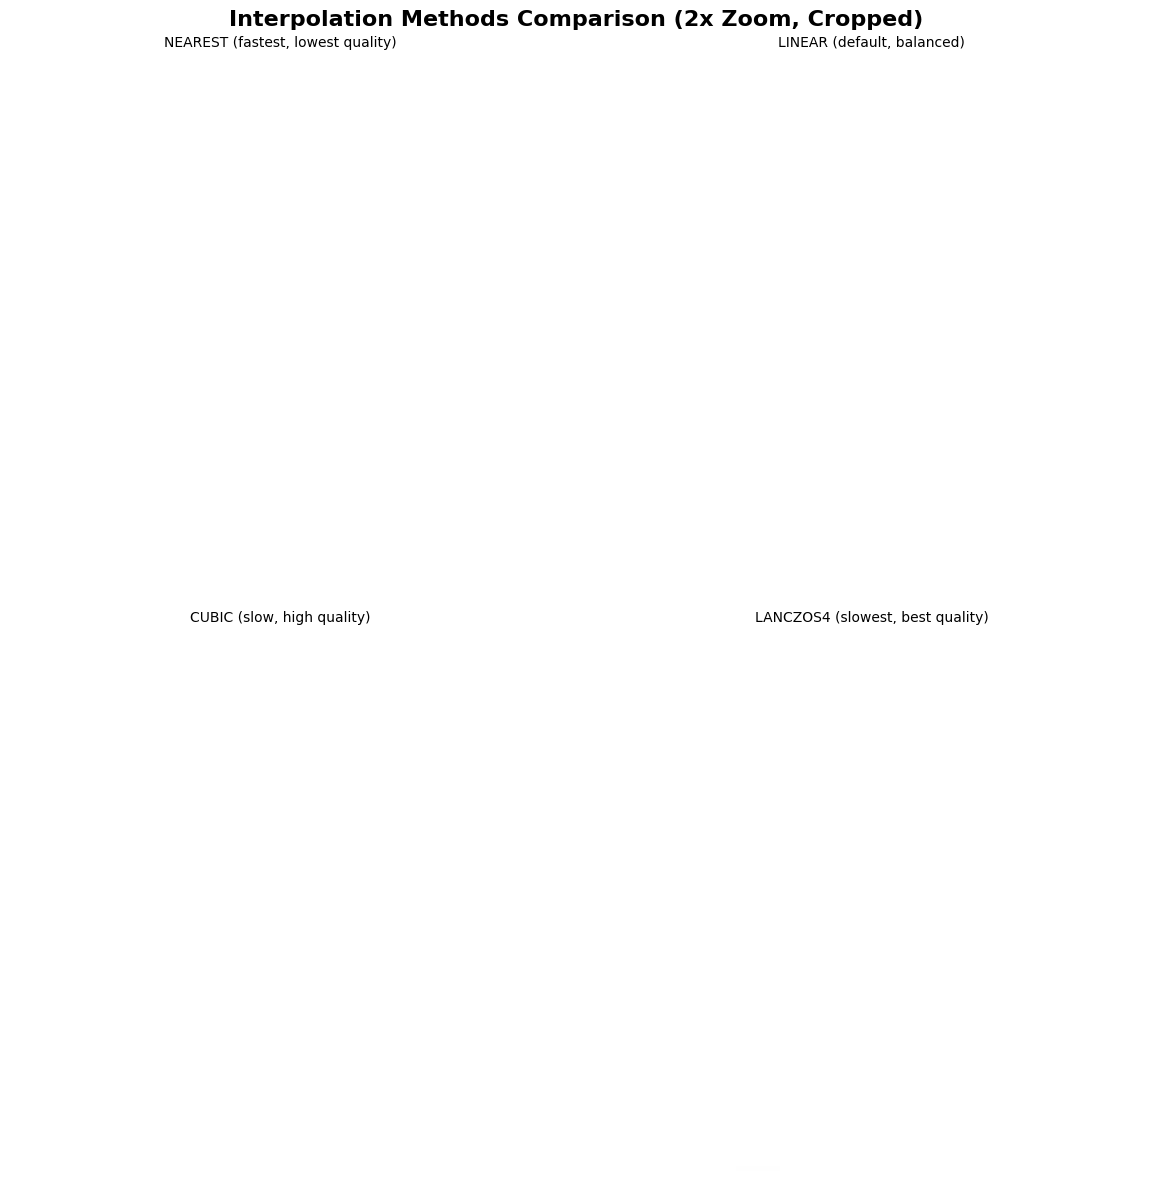

In [ ]:
# 결과를 2x2 그리드로 표시
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열 서브플롯
fig.suptitle('Interpolation Methods Comparison (2x Zoom, Cropped)',
             fontsize=16, fontweight='bold')  # 전체 제목

# 확대 결과들 (일부 영역만)
interp_images = [cropped_nearest, cropped_linear, cropped_cubic, cropped_lanczos]
interp_titles = [
    'NEAREST (fastest, lowest quality)',  # 가장 빠름
    'LINEAR (default, balanced)',  # 기본값
    'CUBIC (slow, high quality)',  # 고품질
    'LANCZOS4 (slowest, best quality)'  # 최고품질
]
# 각 subplot에 이미지 표시
for ax, img, title in zip(axes.flat, interp_images, interp_titles):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR을 RGB로 변환
    ax.imshow(img_rgb)  # 이미지 표시
    ax.set_title(title, fontsize=10)  # 제목 설정
    ax.axis('off')  # 축 숨기기


plt.tight_layout()  # 레이아웃 자동 조정
plt.show()  # 화면에 표시

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
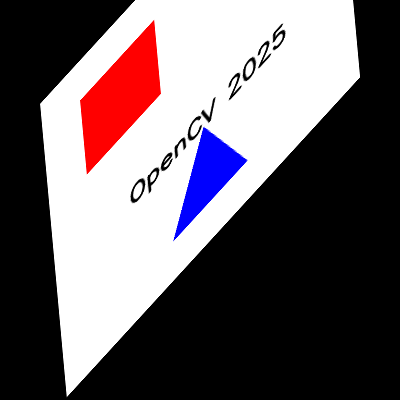

In [ ]:
# 아핀변환 : 3개 점 변환
# 원본 이미지에 3개 점 지정 (삼각형 모서리)
src_pts = np.float32([
    [50, 50],
    [350, 350],
    [50, 350]
])
# 목표 위치의 3개 점 지정(변환 후 위치)
dst_pts = np.float32([
    [80, 100],       # 첫 번째 점 이동
    [320, 80],
    [100, 320]
])
affine_matrix = cv2.getAffineTransform(src_pts, dst_pts)
# affine_matrix
# >> 3개 점 대응 >> 2*3 행렬
'''
array([[ 7.33333333e-01,  6.66666667e-02,  4.00000000e+01],
       [-8.00000000e-01,  7.33333333e-01,  1.03333333e+02]])'''
# 아핀 변환 적용
affine_result = cv2.warpAffine(
    sample_img,
    affine_matrix,
    (width, height)
)
affine_result

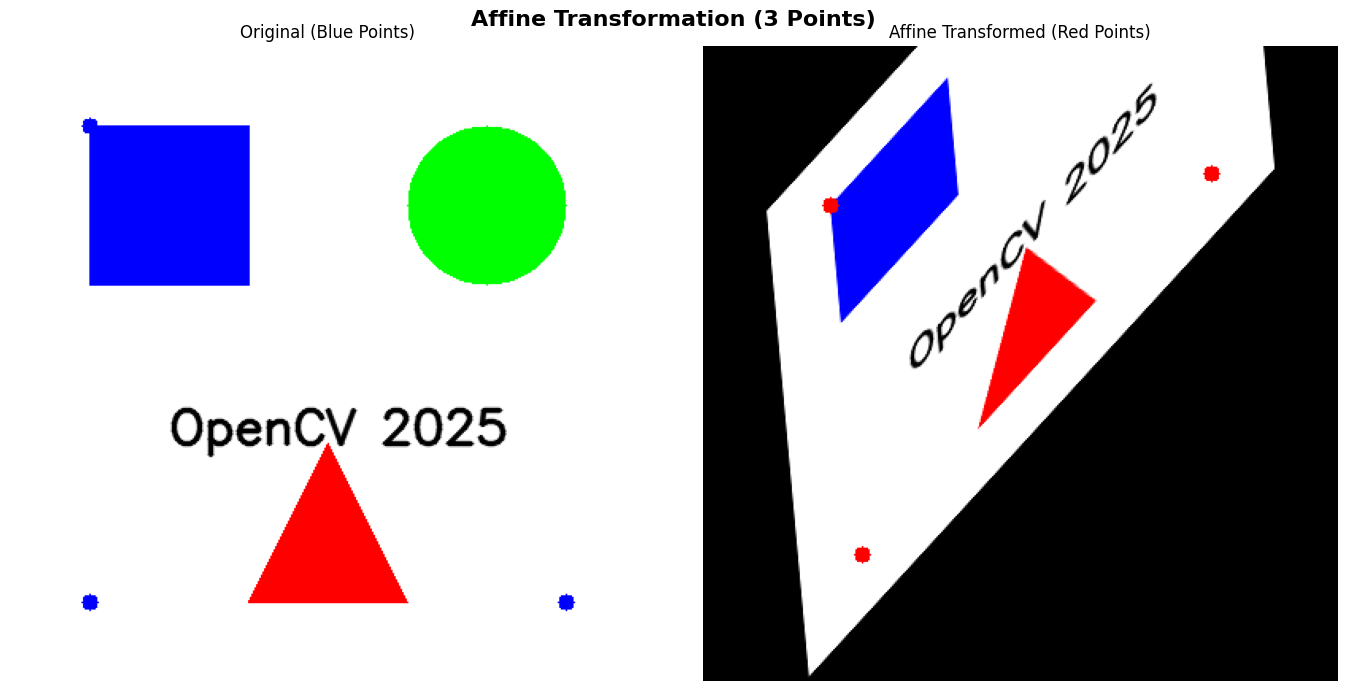

In [ ]:
# 원본 이미지에 점 표시

original_with_pts = sample_img.copy()
# 원본 이미지에 점 표시
for pt in src_pts:
    cv2.circle(original_with_pts,
                tuple(map(int, pt)), # 점 위치(반복되는 p 위치)
                5, # 반지름(radius)
                (255, 0, 0), # BGR(파란색)
                -1) # 채움
# 변환된 이미지에 점 표시
affine_with_pts = affine_result.copy()
for pt in dst_pts:
    cv2.circle(affine_with_pts,
                tuple(map(int, pt)), # 점 위치(반복되는 p 위치)
                5, # 반지름(radius)
                (0, 0, 255), # BGR(파란색)
                -1) # 채움

# 결과를 나란히 표시
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1행 2열 서브플롯
fig.suptitle('Affine Transformation (3 Points)', fontsize=16, fontweight='bold')

# 원본 (파란 점)
axes[0].imshow(cv2.cvtColor(original_with_pts, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original (Blue Points)', fontsize=12)
axes[0].axis('off')

# 변환 결과 (빨간 점)
axes[1].imshow(cv2.cvtColor(affine_with_pts, cv2.COLOR_BGR2RGB))
axes[1].set_title('Affine Transformed (Red Points)', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()

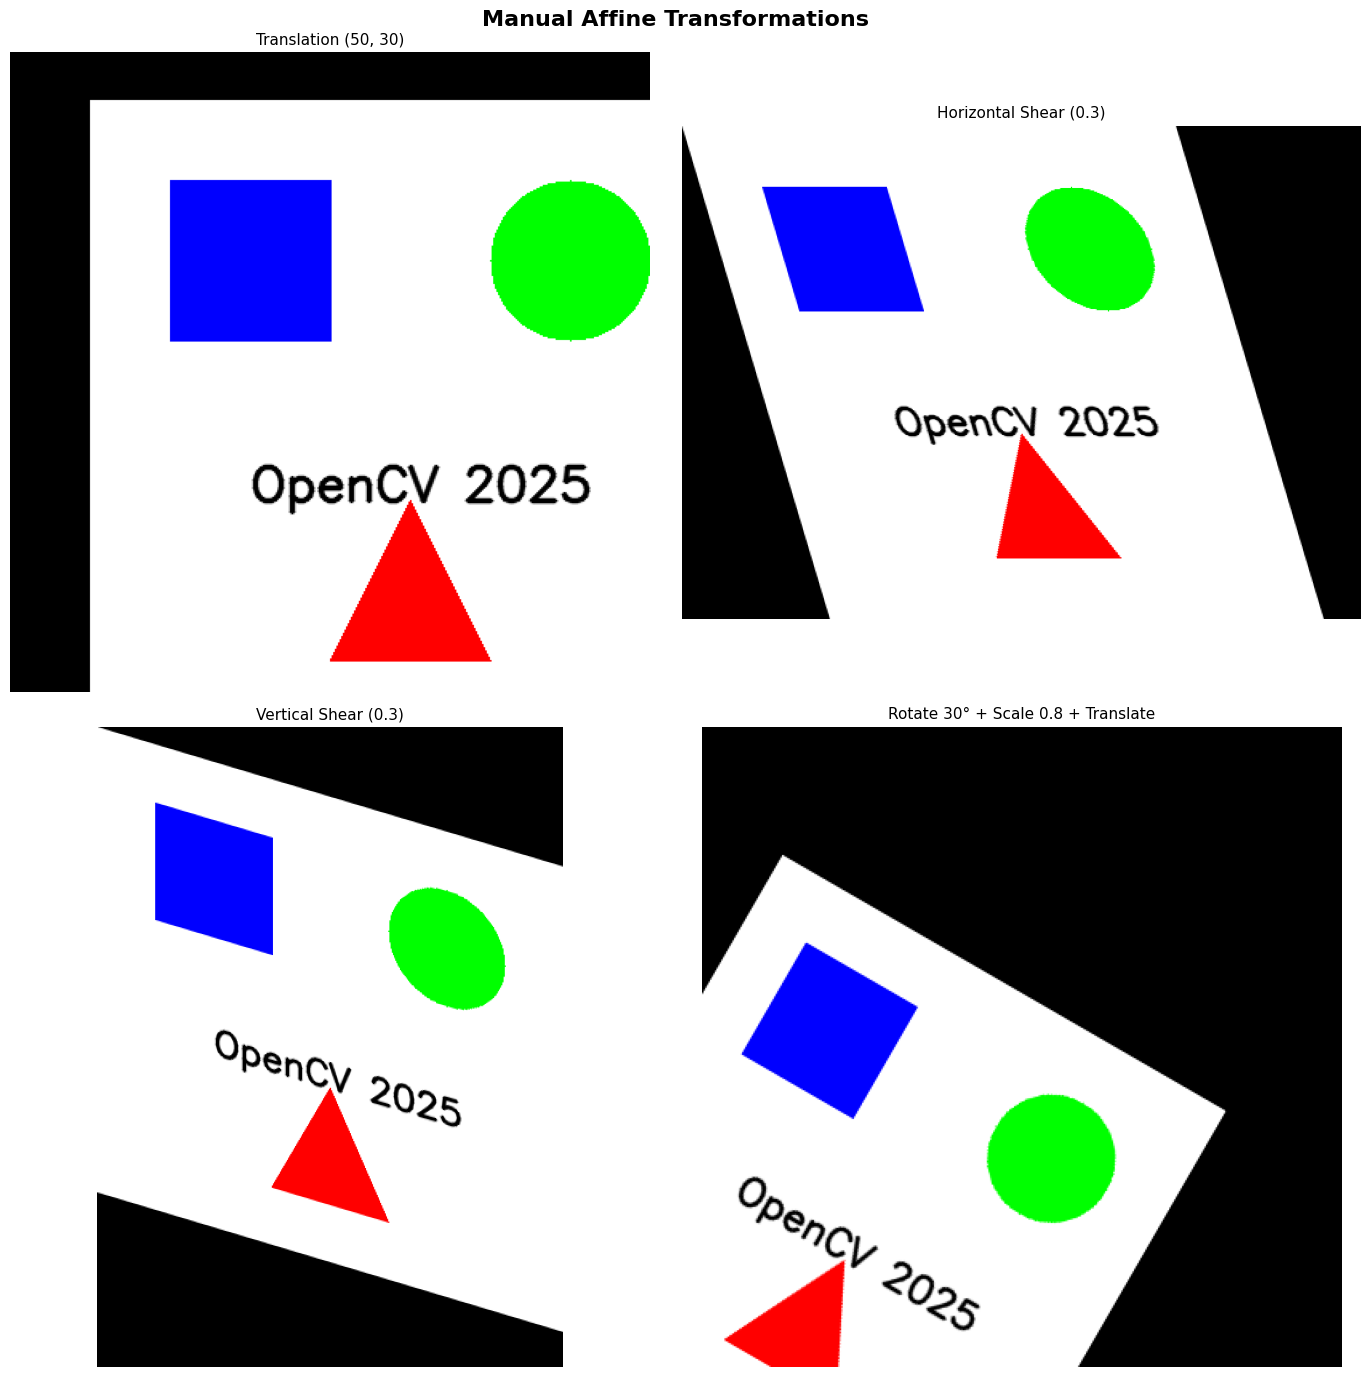

In [ ]:
# 수동으로 Affine 변환 행렬 만들기
# 행렬 구조: [[a, b, tx], [c, d, ty]]
# a, d: 크기 조절
# b, c: 기울이기 (shear)
# tx, ty: 이동

# 1) 단순 이동 (Translation)
translate_matrix = np.float32([
    [1, 0, 50],   # x축: 크기 유지, 기울임 없음, 오른쪽 50픽셀 이동
    [0, 1, 30]    # y축: 크기 유지, 기울임 없음, 아래 30픽셀 이동
])
translated = cv2.warpAffine(sample_img, translate_matrix, (width, height))

# 2) 수평 기울이기 (Horizontal Shear)
shear_x_matrix = np.float32([
    [1, 0.3, 0],  # x축: 크기 유지, y값에 따라 x 이동 (기울임), 이동 없음
    [0, 1, 0]     # y축: 변화 없음
])
sheared_x = cv2.warpAffine(sample_img, shear_x_matrix, (width + 150, height))
# 가로 크기를 늘려서 잘리지 않게 함

# 3) 수직 기울이기 (Vertical Shear)
shear_y_matrix = np.float32([
    [1, 0, 0],    # x축: 변화 없음
    [0.3, 1, 0]   # y축: 크기 유지, x값에 따라 y 이동 (기울임), 이동 없음
])
sheared_y = cv2.warpAffine(sample_img, shear_y_matrix, (width, height + 150))
# 세로 크기를 늘려서 잘리지 않게 함

# 4) 복합 변환 (회전 + 크기 + 이동)
# cos(30°) ≈ 0.866, sin(30°) ≈ 0.5
angle_rad = np.radians(30)  # 30도를 라디안으로 변환
cos_val = np.cos(angle_rad)  # 코사인 값 계산
sin_val = np.sin(angle_rad)  # 사인 값 계산
scale = 0.8  # 0.8배 축소

complex_matrix = np.float32([
    [cos_val * scale, -sin_val * scale, 50],  # 회전 + 축소 + 이동
    [sin_val * scale, cos_val * scale, 80]    # 회전 + 축소 + 이동
])
complex_transformed = cv2.warpAffine(sample_img, complex_matrix, (width, height))

# 결과를 2x2 그리드로 표시
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle('Manual Affine Transformations', fontsize=16, fontweight='bold')

# 변환 결과들
affine_results = [translated, sheared_x, sheared_y, complex_transformed]
affine_titles = [
    'Translation (50, 30)',  # 이동
    'Horizontal Shear (0.3)',  # 수평 기울임
    'Vertical Shear (0.3)',  # 수직 기울임
    'Rotate 30° + Scale 0.8 + Translate'  # 복합 변환
]

# 각 subplot에 이미지 표시
for ax, img, title in zip(axes.flat, affine_results, affine_titles):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.set_title(title, fontsize=11)
    ax.axis('off')


plt.tight_layout()
plt.show()


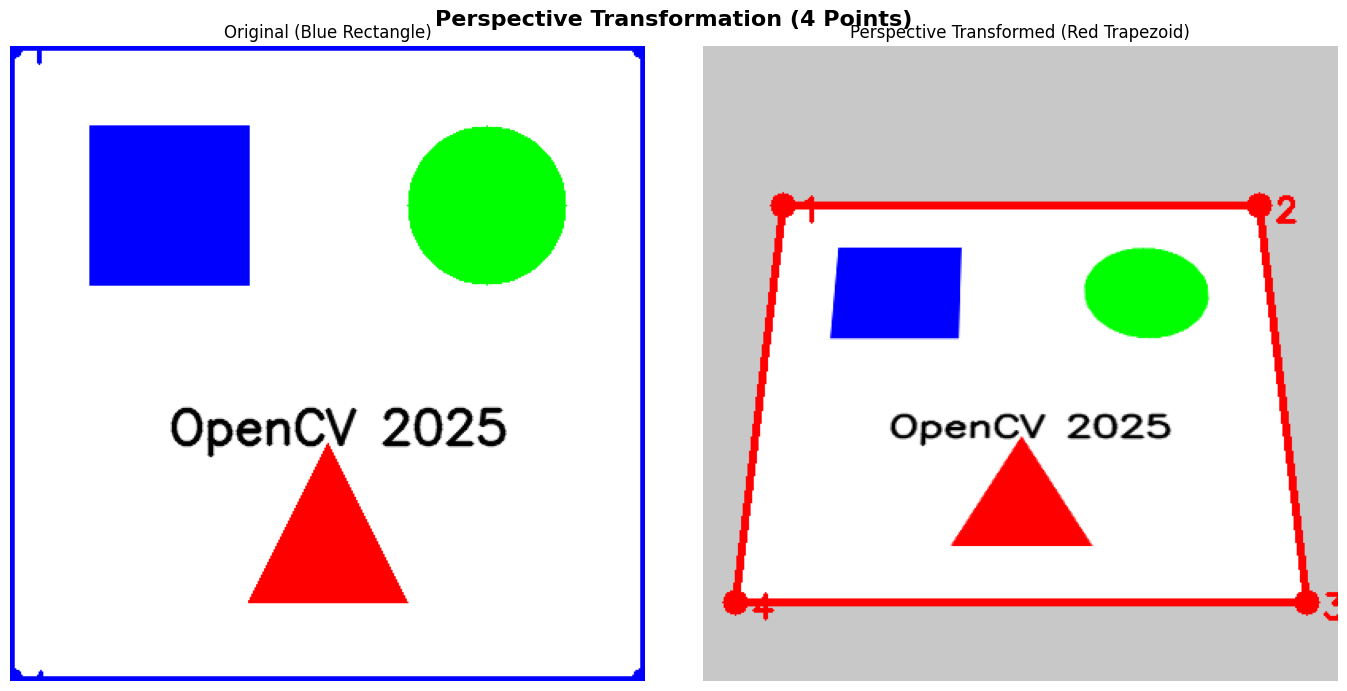

In [ ]:
# Perspective 변환 - 4개의 점을 이용한 원근 변환
# 비스듬하게 찍힌 사진을 정면으로 보정할 때 사용

# 원본 이미지의 4개 꼭지점 (사각형)
src_pts_persp = np.float32([
    [0, 0],           # 왼쪽 위
    [width-1, 0],     # 오른쪽 위
    [width-1, height-1],  # 오른쪽 아래
    [0, height-1]     # 왼쪽 아래
])


# 목표 위치 4개 점 (사다리꼴 모양으로 변환)
dst_pts_persp = np.float32([
    [50, 100],        # 왼쪽 위 → 오른쪽+아래 이동
    [width-50, 100],  # 오른쪽 위 → 왼쪽+아래 이동
    [width-20, height-50],  # 오른쪽 아래 → 왼쪽+위 이동
    [20, height-50]   # 왼쪽 아래 → 오른쪽+위 이동
])
# 결과: 위쪽이 좁고 아래쪽이 넓은 사다리꼴 (원근감)


# Perspective 변환 행렬 계산 (3x3 행렬)
perspective_matrix = cv2.getPerspectiveTransform(
    src_pts_persp,  # 원본 4점
    dst_pts_persp   # 목표 4점
)


# Perspective 변환 적용
perspective_result = cv2.warpPerspective(
    sample_img,  # 원본 이미지
    perspective_matrix,  # 3x3 변환 행렬
    (width, height),  # 출력 크기
    borderValue=(200, 200, 200)  # 빈 공간을 회색으로 채움
                                 # 직선 살리고 평행선 소실
)


# 시각화: 원본과 목표 점들을 선으로 연결
original_persp = sample_img.copy()
perspective_persp = perspective_result.copy()


# 원본 이미지에 점과 선 그리기
for i, pt in enumerate(src_pts_persp):
    # 점 그리기
    cv2.circle(
        original_persp,
        tuple(pt.astype(int)),
        8,
        (255, 0, 0),  # 파란색
        -1
    )
    # 점 번호 표시
    cv2.putText(
        original_persp,
        str(i+1),
        tuple((pt + [10, 10]).astype(int)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (255, 0, 0),
        2
    )


# 사각형 테두리 그리기
cv2.polylines(
    original_persp,
    [src_pts_persp.astype(int)],  # 점들을 int로 변환
    True,  # 닫힌 도형
    (255, 0, 0),  # 파란색
    3  # 선 두께
)


# 변환된 이미지에 점과 선 그리기
for i, pt in enumerate(dst_pts_persp):
    cv2.circle(
        perspective_persp,
        tuple(pt.astype(int)),
        8,
        (0, 0, 255),  # 빨간색
        -1
    )
    cv2.putText(
        perspective_persp,
        str(i+1),
        tuple((pt + [10, 10]).astype(int)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 0, 255),
        2
    )


cv2.polylines(
    perspective_persp,
    [dst_pts_persp.astype(int)],
    True,
    (0, 0, 255),  # 빨간색
    3
)


# 결과 표시
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Perspective Transformation (4 Points)', fontsize=16, fontweight='bold')


# 원본 (파란색 사각형)
axes[0].imshow(cv2.cvtColor(original_persp, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original (Blue Rectangle)', fontsize=12)
axes[0].axis('off')


# 변환 결과 (빨간색 사다리꼴)
axes[1].imshow(cv2.cvtColor(perspective_persp, cv2.COLOR_BGR2RGB))
axes[1].set_title('Perspective Transformed (Red Trapezoid)', fontsize=12)
axes[1].axis('off')


plt.tight_layout()
plt.show()


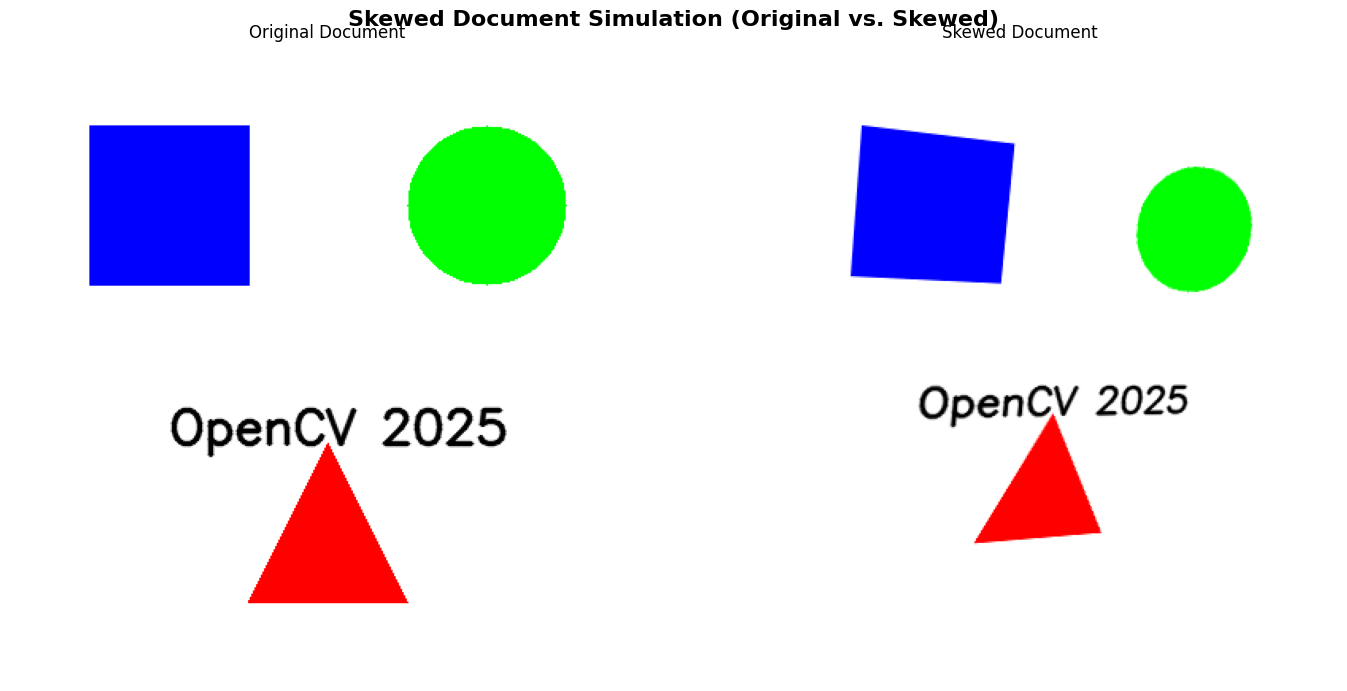

In [ ]:
# 실전 예제: 비스듬한 문서를 정면으로 보정하기
# (문서 스캐너 앱의 원리)


# 비스듬한 문서 시뮬레이션
# 원본을 먼저 비스듬하게 만들고, 다시 정면으로 복원


# Step 1: 정면 → 비스듬하게 (원근 효과 추가)
src_straight = np.float32([
    [50, 50],
    [width-50, 50],
    [width-50, height-50],
    [50, height-50]
])


dst_skewed = np.float32([
    [100, 50],       # 왼쪽 위
    [width-50, 80],  # 오른쪽 위
    [width-80, height-100],  # 오른쪽 아래
    [80, height-80]  # 왼쪽 아래
])


# 비스듬하게 만들기
M_skew = cv2.getPerspectiveTransform(src_straight, dst_skewed) # 변환행렬
skewed_document = cv2.warpPerspective(
    sample_img,
    M_skew,
    (width, height),
    borderValue=(255, 255, 255)  # 흰색 배경
)

# 결과 표시
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Skewed Document Simulation (Original vs. Skewed)', fontsize=16, fontweight='bold')

# 원본 이미지
axes[0].imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Document', fontsize=12)
axes[0].axis('off')

# 비스듬하게 변환된 문서
axes[1].imshow(cv2.cvtColor(skewed_document, cv2.COLOR_BGR2RGB))
axes[1].set_title('Skewed Document', fontsize=12)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 실습 응용